# Exercise 1 #
Use the Wine dataset from sklearn:
- scale with `StandardScaler`
- apply `PCA`
- use `GradientBoostingClassifier`
- optimize hyperparameters with `RandomizedSearchCV`
- evaluate performance using `StratifiedKFold` to ensure class proportions are maintained

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,RandomizedSearchCV,StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

sns.set_theme(style="whitegrid")

In [30]:
data = load_wine()
x = data.data
y = data.target
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=123,stratify=y)

In [31]:
pipeline_scale_pca_gbc = Pipeline([('scale', StandardScaler()),('pca', PCA()),('gbc', GradientBoostingClassifier(random_state=123))])
param_grid = {'pca__n_components': [2,4,6,8], 'gbc__n_estimators': [100,200,300], 'gbc__learning_rate': [0.001,0.01,0.1], 'gbc__max_depth': [3,5,7], 'gbc__min_samples_split': [2,5,10]}

grid_search = RandomizedSearchCV(pipeline_scale_pca_gbc, param_grid, cv=StratifiedKFold(n_splits=5), n_iter=100, verbose=1, random_state=123, n_jobs=-1)
grid_search.fit(x_train, y_train)
print(f"Best parameters found: {grid_search.best_params_}")

best_model = grid_search.best_estimator_
predictions = best_model.predict(x_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found: {'pca__n_components': 4, 'gbc__n_estimators': 200, 'gbc__min_samples_split': 2, 'gbc__max_depth': 3, 'gbc__learning_rate': 0.1}


In [32]:
# OUTPUT:

# Fitting 5 folds for each of 100 candidates, totalling 500 fits
# Best parameters found: {'pca__n_components': 4, 'gbc__n_estimators': 200, 'gbc__min_samples_split': 2, 'gbc__max_depth': 3, 'gbc__learning_rate': 0.1}

In [33]:
accuracy = accuracy_score(y_test,predictions)
print(f"Accuracy = {100*accuracy:.2f}%")

Accuracy = 97.78%


In [34]:
report = classification_report(y_test,predictions,target_names=data.target_names)
print(f'Classification report:\n{report}')

Classification report:
              precision    recall  f1-score   support

     class_0       1.00      0.93      0.97        15
     class_1       0.95      1.00      0.97        18
     class_2       1.00      1.00      1.00        12

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [35]:
conf_mat = confusion_matrix(y_test,predictions)
print(conf_mat)

[[14  1  0]
 [ 0 18  0]
 [ 0  0 12]]


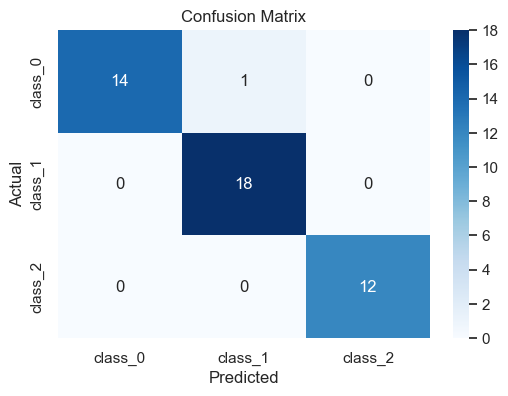

In [37]:
plt.figure(figsize=(6,4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()